In [1]:
import pandas as pd
import numpy as np
import sys
from os.path import join
import altair as alt # Python wrapper for Vega-Lite visualisation grammarimport altair as alt

In [2]:
# Configure altair theme
def alt_theme():
    return {
        'config': {
            'background': 'white'
        }
    }

# register the custom theme under a chosen name
alt.themes.register('alt_theme', alt_theme)

# enable the newly registered theme
alt.themes.enable('alt_theme')


ThemeRegistry.enable('alt_theme')

In [3]:
# https://altair-viz.github.io/user_guide/faq.html#altair-faq-large-notebook
# alt.data_transformers.enable('json')

In [4]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [5]:
DATA_DIR = "../output/"

In [6]:
ver_df = pd.read_csv(join(DATA_DIR, "results_version.csv"))

In [7]:
ver_df

,repo,path,ver
0,72225778,72225778/predict.py,either
1,72225778,72225778/text_cnn_rnn.py,either
2,72225778,72225778/data_helper.py,either
3,72225778,72225778/train.py,either
4,118248283,118248283/train_speech_commands.py,either
...,...,...,...
7936,88318858,88318858/batchgen.py,python2
7937,88318858,88318858/train.py,python2
7938,40576835,40576835/get_accuracies.py,python2
7939,40576835,40576835/api_benchmarks.py,python2


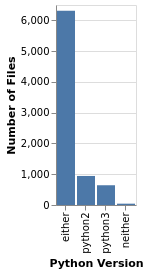

In [64]:
chart = alt.Chart(ver_df).mark_bar().encode(
    alt.X("ver", axis=alt.Axis(title='Python Version'), sort=["either", "python2", "python3", "neither"]),
    y=alt.Y('count()', axis=alt.Axis(title='Number of Files')),
)
chart

In [67]:
chart.save("number-of-files-vs-py-version.svg")

In [10]:
ver_df

,repo,path,ver
0,72225778,72225778/predict.py,either
1,72225778,72225778/text_cnn_rnn.py,either
2,72225778,72225778/data_helper.py,either
3,72225778,72225778/train.py,either
4,118248283,118248283/train_speech_commands.py,either
...,...,...,...
7936,88318858,88318858/batchgen.py,python2
7937,88318858,88318858/train.py,python2
7938,40576835,40576835/get_accuracies.py,python2
7939,40576835,40576835/api_benchmarks.py,python2


In [11]:
ver_group_df = ver_df.groupby(["repo", "ver"]).count()
ver_group_df_flat = pd.DataFrame(ver_group_df.to_records())
ver_group_df_flat

,repo,ver,path
0,41590,either,12
1,41590,neither,1
2,41590,python2,16
3,118130,either,16
4,118130,python2,28
...,...,...,...
363,115672915,either,73
364,115672915,python2,1
365,118248283,either,18
366,119537109,either,71


In [12]:
ver_group_df_flat = ver_group_df_flat.rename(columns={"path": "vercnt"})

In [13]:
ver_group_df_flat

,repo,ver,vercnt
0,41590,either,12
1,41590,neither,1
2,41590,python2,16
3,118130,either,16
4,118130,python2,28
...,...,...,...
363,115672915,either,73
364,115672915,python2,1
365,118248283,either,18
366,119537109,either,71


In [14]:
tab = ver_group_df_flat.pivot(index="repo", columns="ver", values="vercnt")

In [15]:
tab = tab.fillna(0)

In [16]:
tab

ver,either,neither,python2,python3
repo,,,,
41590,12.0,1.0,16.0,0.0
118130,16.0,0.0,28.0,1.0
550482,11.0,0.0,2.0,0.0
590142,501.0,0.0,131.0,0.0
607040,0.0,0.0,1.0,0.0
...,...,...,...,...
112664267,43.0,0.0,0.0,1.0
114098658,40.0,0.0,0.0,2.0
115672915,73.0,0.0,1.0,0.0


In [17]:
tab.columns

Index(['either', 'neither', 'python2', 'python3'], dtype='object', name='ver')

In [18]:
def summarize(either, neither, python2, python3):
    if neither > 0:
        return 'neither'
    if python3 == 0 and python2 > 0:
        return 'only2'
    if python2 == 0 and python3 > 0:
        return 'only3'
    if python3 == 0 and python2 == 0 and either > 0:
        return 'either'
    if python2 > 0 and python3 > 0:
        return 'mix'
    else:
        return 'empty'

In [19]:
summarize_vec = np.vectorize(summarize)

In [20]:
# test summarize follows intuition

In [21]:
import itertools

In [22]:
combs = sorted(itertools.product([0,1], repeat=4))

In [23]:
combs

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [24]:
example_df = pd.DataFrame(combs,
                          columns=['either', 'neither', 'python2', 'python3'])
example_df

,either,neither,python2,python3
0,0,0,0,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,1
4,0,1,0,0
5,0,1,0,1
6,0,1,1,0
7,0,1,1,1
8,1,0,0,0
9,1,0,0,1


In [25]:
example_df['summary'] = example_df.apply(
    lambda x: summarize_vec(x.either, x.neither, x.python2, x.python3),
    axis=1)

In [26]:
example_df

,either,neither,python2,python3,summary
0,0,0,0,0,empty
1,0,0,0,1,only3
2,0,0,1,0,only2
3,0,0,1,1,mix
4,0,1,0,0,neither
5,0,1,0,1,neither
6,0,1,1,0,neither
7,0,1,1,1,neither
8,1,0,0,0,either
9,1,0,0,1,only3


In [27]:
tab['summary'] = tab.apply(
    lambda x: summarize_vec(x.either, x.neither, x.python2, x.python3),
    axis=1)

In [28]:
tab

ver,either,neither,python2,python3,summary
repo,,,,,
41590,12.0,1.0,16.0,0.0,neither
118130,16.0,0.0,28.0,1.0,mix
550482,11.0,0.0,2.0,0.0,only2
590142,501.0,0.0,131.0,0.0,only2
607040,0.0,0.0,1.0,0.0,only2
...,...,...,...,...,...
112664267,43.0,0.0,0.0,1.0,only3
114098658,40.0,0.0,0.0,2.0,only3
115672915,73.0,0.0,1.0,0.0,only2


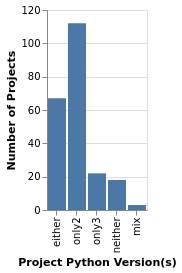

In [68]:
chart = alt.Chart(tab).mark_bar().encode(
    alt.X("summary", axis=alt.Axis(title='Project Python Version(s)'), sort=["either", "only2", "only3", "neither"]),
    y=alt.Y('count()', title="Number of Projects"),
)
chart

In [69]:
chart.save("number-of-projects-vs-py-version.svg")

In [31]:
tab[tab["summary"] == "mix"]

ver,either,neither,python2,python3,summary
repo,,,,,
118130,16.0,0.0,28.0,1.0,mix
20030361,1.0,0.0,1.0,1.0,mix
74382727,22.0,0.0,4.0,1.0,mix


- Repo 118130 is really a collection of algorithm implementations, each in their own directory. Some directories are Python2, others are Python3, and there is also some Ruby and R code.
- Repo 20030361 is a Python binding to a C++ library. It includes an examples for Python2 and Python3.
- Repo 74382727 appears to use Python3, however has a directory named "archived" that contains some Python2 code.

In [32]:
len(tab[tab["summary"] == "neither"])

18

In [33]:
tab[tab["summary"] == "neither"]

ver,either,neither,python2,python3,summary
repo,,,,,
41590,12.0,1.0,16.0,0.0,neither
3932246,2.0,1.0,3.0,0.0,neither
4035165,2.0,2.0,12.0,0.0,neither
17856536,306.0,1.0,215.0,0.0,neither
30111238,0.0,1.0,0.0,0.0,neither
32882199,18.0,1.0,2.0,0.0,neither
34418318,11.0,1.0,12.0,0.0,neither
40087278,1.0,1.0,0.0,0.0,neither
41890193,6.0,1.0,0.0,13.0,neither


- Repo 41590 contains a file `41590/nlp/naivebayes.py` with bad spacing (mix of tabs and spaces).
- Repo 3932246 contains a file that appears to be Python2, but contains a syntax error.
- Repo 4035165 contains a file that appears to be Python2, but contains a syntax error.
- Repo 17856536 contains a file `17856536/front-end/web2py/setup_exe_2.6.py` copied from the web2py project (1.8 K stars), but contains a syntax error. It was removed from the web2py project in 2012 https://github.com/web2py/web2py/commit/0b0fddb88697b91bef682709a47d402e7372215d
- Repo 30111238 contains a file that appears to be Python2, but contains a syntax error.
- Repo 32882199 contains a file that appears to be Python2, but contains a syntax error due to a comment *within* a print statement.
- Repo 34418318 contains a file `34418318/misc.py` that was committed with unresolved git merge conflicts.
- Repo 40087278 contains a **symlink** to a python file outside of the repo.
- Repo 41890193 contains a file with mismatched braces
- Repo 46939261 contains a file with invalid syntax (a multiline docstring on the same line as code)
- Repo 61813823 **is valid Python3 syntax**. The problematic files contain unicode and begin with a byte order mark. My code failed to parse the ast because I was reading the files in as text rather than binary. **TODO: FIX**
- Repo 71290783 contains a file with a syntax error (repeated keyword argument)
- Repo 73594093 contains a file with a syntax error (if loop with no body)
- Repo 79748320 contains a file with a syntax error (indentation error)
- Repo 97508182 contains a file with a syntax error ('else' before 'if')
- Repo 99785600 contains a script `99785600/data/arXiv/download.py` with the line "%matplotlib inline" and notes "please copy the code into a **jupyter notebook** to run it"
- Repo 104676745 contains a commit of an entire Python2 venv environment, which contains **symlinks** to system Python files outside the project.

In [34]:
ver_df[ver_df["ver"] == "neither"].sort_values("repo")

,repo,path,ver
7031,41590,41590/nlp/naivebayes.py,neither
6889,3932246,3932246/classifier.py,neither
1807,4035165,4035165/manager.py,neither
1810,4035165,4035165/classifier.py,neither
7231,17856536,17856536/front-end/web2py/setup_exe_2.6.py,neither
2990,30111238,30111238/experiments/lexiconevaluation.py,neither
4542,32882199,32882199/bin/senna-tag.py,neither
5683,34418318,34418318/misc.py,neither
1605,40087278,40087278/__armando__/__init__.py,neither
3626,41890193,41890193/chainer-1.5/LSTMVariants.py,neither


In [35]:
#ver_df[(ver_df["ver"] == "python3") & (ver_df["repo"] == 74382727)].sort_values("repo")

In [36]:
tab[tab["python2"] > 0].sort_values("python2")

ver,either,neither,python2,python3,summary
repo,,,,,
115672915,73.0,0.0,1.0,0.0,only2
8373425,4.0,0.0,1.0,0.0,only2
28282507,0.0,0.0,1.0,0.0,only2
19346982,45.0,0.0,1.0,0.0,only2
9651619,0.0,0.0,1.0,0.0,only2
...,...,...,...,...,...
14284950,10.0,0.0,20.0,0.0,only2
15985050,58.0,0.0,22.0,0.0,only2
118130,16.0,0.0,28.0,1.0,mix


In [37]:
tab[tab["python3"] > 0].sort_values("python3")

ver,either,neither,python2,python3,summary
repo,,,,,
118130,16.0,0.0,28.0,1.0,mix
112664267,43.0,0.0,0.0,1.0,only3
80504468,6.0,0.0,0.0,1.0,only3
77662713,12.0,0.0,0.0,1.0,only3
74382727,22.0,0.0,4.0,1.0,mix
70148832,7.0,0.0,0.0,1.0,only3
44304626,2.0,0.0,0.0,1.0,only3
119537109,71.0,0.0,0.0,1.0,only3
13261025,9.0,0.0,0.0,1.0,only3


Most of the Python3 only files are in 91356408 (allennlp), which makes use of type hints (introduced in Python 3.5)

## Use Pylint results to decide Python type for repos that could be either

In [38]:
lint_df2 = pd.read_csv(join(DATA_DIR, "results_pylint_python2.csv"))

In [39]:
lint_df3 = pd.read_csv(join(DATA_DIR, "results_pylint_python3.csv"))

In [40]:
# Inspired by Pylint score forumla: https://docs.pylint.org/en/1.6.0/faq.html
# 10.0 - ((float(5 * error + warning + refactor + convention) / statement) * 10)

# Differences:
# - We don't normalize by the number of statements
#   (will cancel out when we compare scores against same project)
# - We add an very-large penalty for fatal errors (i.e. Pylint couldn't process file any further, e.g. because symlink to missing file)

LARGE_PENALTY = 10**6 # 1M (could also use np.inf, but makes it hard to compare number of penalties)

def total(df):
    return 5 * df.error + df.warning + df.refactor + df.convention + np.where(df.fatal, LARGE_PENALTY, 0)

In [41]:
def tally(lint_df, pen_col_name = "penalty"):
    lint_df_table = lint_df[["repo", "path", "type"]].pivot_table(index="repo", columns="type", aggfunc="count").fillna(0)
    
    # https://stackoverflow.com/questions/14507794/pandas-how-to-flatten-a-hierarchical-index-in-columns
    lint_df_table.columns = lint_df_table.columns.get_level_values(1)

    lint_df_table[pen_col_name] = total(lint_df_table)
    
    return lint_df_table

In [42]:
lint_df2_table = tally(lint_df2, "py2penalty")

In [43]:
#pd.set_option("display.max_rows", 1000)

In [44]:
lint_df2_table

type,convention,error,fatal,refactor,warning,py2penalty
repo,,,,,,
41590,753.0,34.0,0.0,44.0,2294.0,3261.0
118130,2594.0,129.0,0.0,111.0,230.0,3580.0
550482,314.0,5.0,0.0,35.0,136.0,510.0
590142,10367.0,2788.0,0.0,1418.0,4809.0,30534.0
607040,22.0,4.0,0.0,3.0,5.0,50.0
...,...,...,...,...,...,...
112664267,1762.0,164.0,0.0,150.0,415.0,3147.0
114098658,2118.0,139.0,0.0,64.0,182.0,3059.0
115672915,620.0,161.0,0.0,117.0,271.0,1813.0


In [45]:
# pd.reset_option("display.max_rows")

In [46]:
pd.reset_option("display.max_rows")

In [47]:
lint_df3[lint_df3["repo"] == 41590]

,repo,path,type,module,obj,line,column,path.1,symbol,message,message-id,parse_error,internal_error
540925,41590,41590/nlp/minimizer.py,error,minimizer,NaN,23.0,48.0,nlp/minimizer.py,syntax-error,Missing parentheses in call to 'print'. Did yo...,E0001,True,False
540926,41590,41590/nlp/perftimings.py,error,perftimings,NaN,26.0,37.0,nlp/perftimings.py,syntax-error,Missing parentheses in call to 'print'. Did yo...,E0001,True,False
540927,41590,41590/nlp/pos_hmm.py,error,pos_hmm,NaN,42.0,24.0,nlp/pos_hmm.py,syntax-error,"invalid syntax (&lt;unknown&gt;, line 42)",E0001,True,False
540928,41590,41590/nlp/crp.py,error,crp,NaN,43.0,46.0,nlp/crp.py,syntax-error,"invalid syntax (&lt;unknown&gt;, line 43)",E0001,True,False
540929,41590,41590/nlp/gaussian_clusters.py,error,gaussian_clusters,NaN,72.0,38.0,nlp/gaussian_clusters.py,syntax-error,Missing parentheses in call to 'print'. Did yo...,E0001,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541573,41590,41590/nlp/test-minimizer.py,warning,test-minimizer,NaN,1.0,0.0,nlp/test-minimizer.py,unused-import,Unused izip imported from itertools,W0611,True,False
541574,41590,41590/nlp/synonyms.py,error,synonyms,NaN,48.0,11.0,nlp/synonyms.py,syntax-error,"invalid syntax (&lt;unknown&gt;, line 48)",E0001,True,False
541575,41590,41590/nlp/maximumentropy.py,error,maximumentropy,NaN,56.0,41.0,nlp/maximumentropy.py,syntax-error,Missing parentheses in call to 'print'. Did yo...,E0001,True,False
541576,41590,41590/nlp/lib/__init__.py,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


In [48]:
lint_df3_table = tally(lint_df3, "py3penalty")

In [49]:
lint_df3_table

type,convention,error,fatal,refactor,warning,py3penalty
repo,,,,,,
41590,139.0,51.0,0.0,16.0,446.0,856.0
118130,1211.0,77.0,0.0,58.0,83.0,1737.0
550482,217.0,24.0,0.0,34.0,104.0,475.0
590142,5377.0,2064.0,0.0,1040.0,1280.0,18017.0
607040,0.0,1.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...
112664267,1713.0,144.0,0.0,191.0,393.0,3017.0
114098658,2118.0,142.0,0.0,81.0,185.0,3094.0
115672915,589.0,154.0,0.0,202.0,255.0,1816.0


In [50]:
lint_df3_table["py3penalty"]

repo
41590          856.0
118130        1737.0
550482         475.0
590142       18017.0
607040           5.0
              ...   
112664267     3017.0
114098658     3094.0
115672915     1816.0
118248283      972.0
119537109     2667.0
Name: py3penalty, Length: 222, dtype: float64

In [51]:
tab2 = tab.merge(lint_df2_table["py2penalty"], how='left', left_on='repo', right_on='repo')

In [52]:
tab3 = tab2.merge(lint_df3_table["py3penalty"], how='left', left_on='repo', right_on='repo')

In [53]:
tab3

,either,neither,python2,python3,summary,py2penalty,py3penalty
repo,,,,,,,
41590,12.0,1.0,16.0,0.0,neither,3261.0,856.0
118130,16.0,0.0,28.0,1.0,mix,3580.0,1737.0
550482,11.0,0.0,2.0,0.0,only2,510.0,475.0
590142,501.0,0.0,131.0,0.0,only2,30534.0,18017.0
607040,0.0,0.0,1.0,0.0,only2,50.0,5.0
...,...,...,...,...,...,...,...
112664267,43.0,0.0,0.0,1.0,only3,3147.0,3017.0
114098658,40.0,0.0,0.0,2.0,only3,3059.0,3094.0
115672915,73.0,0.0,1.0,0.0,only2,1813.0,1816.0


In [54]:
tab3["pylint_summary"] = np.where(tab3["py3penalty"] > tab3["py2penalty"], "py2", "py3")

In [55]:
tab3

,either,neither,python2,python3,summary,py2penalty,py3penalty,pylint_summary
repo,,,,,,,,
41590,12.0,1.0,16.0,0.0,neither,3261.0,856.0,py3
118130,16.0,0.0,28.0,1.0,mix,3580.0,1737.0,py3
550482,11.0,0.0,2.0,0.0,only2,510.0,475.0,py3
590142,501.0,0.0,131.0,0.0,only2,30534.0,18017.0,py3
607040,0.0,0.0,1.0,0.0,only2,50.0,5.0,py3
...,...,...,...,...,...,...,...,...
112664267,43.0,0.0,0.0,1.0,only3,3147.0,3017.0,py3
114098658,40.0,0.0,0.0,2.0,only3,3059.0,3094.0,py2
115672915,73.0,0.0,1.0,0.0,only2,1813.0,1816.0,py2


In [56]:
# need to coerce to strings for groupby to work
tab3['summary'] = tab3['summary'].astype(str)
tab3['pylint_summary'] = tab3['pylint_summary'].astype(str)

In [57]:
tab3[["summary", "pylint_summary", "py2penalty", "py3penalty"]].pivot_table(index="summary", aggfunc='median')

,py2penalty,py3penalty
summary,,
either,280.0,240.0
mix,1584.0,1211.0
neither,1140.5,943.5
only2,480.0,123.0
only3,934.5,1366.5


Note that, counter-intuitively, there are more pylint2 warnings for Python2 repos, and more pylint3 warnings for Python3 repos. The likely reason is that if a Python repo doesn't parse, Pylint will give just a single error (syntax-error) rather than (the much longer list of) all the actual code smells.

**TODO:**
- Only run pylint against Python repos that could be either
- Discard entirely (for both Py2 and Py3) if Fatal or Internal Error (exception) 

In [58]:
tab3.reset_index()[["summary", "pylint_summary", "repo"]].groupby(["summary", "pylint_summary"]).count()

repo
summary pylint_summary      
either  py2               27
        py3               40
mix     py3                3
neither py2                3
        py3               15
only2   py2                8
        py3              104
only3   py2               14
        py3                8

In [59]:
def bestguess(either, neither, python2, python3, py2penalty, py3penalty):
    # Take the Python version with the least syntax errors
    if python2 > python3:
        return "py2"
    if python3 > python2:
        return "py3"
    # Else use Pylint score to break tie
    if py2penalty > py3penalty:
        return "py3"
    if py3penalty > py2penalty:
        return "py2"
    # In (highly unlikely) case that all equal,
    # assume Python3 (as Python2 has reached end of life)
    return "py3"

In [60]:
tab3["bestguess"] = tab3.apply(lambda x:
           bestguess(x.either, x.neither, x.python2, x.python3, x.py2penalty, x.py3penalty),
           axis=1)

In [61]:
tab3

,either,neither,python2,python3,summary,py2penalty,py3penalty,pylint_summary,bestguess
repo,,,,,,,,,
41590,12.0,1.0,16.0,0.0,neither,3261.0,856.0,py3,py2
118130,16.0,0.0,28.0,1.0,mix,3580.0,1737.0,py3,py2
550482,11.0,0.0,2.0,0.0,only2,510.0,475.0,py3,py2
590142,501.0,0.0,131.0,0.0,only2,30534.0,18017.0,py3,py2
607040,0.0,0.0,1.0,0.0,only2,50.0,5.0,py3,py2
...,...,...,...,...,...,...,...,...,...
112664267,43.0,0.0,0.0,1.0,only3,3147.0,3017.0,py3,py3
114098658,40.0,0.0,0.0,2.0,only3,3059.0,3094.0,py2,py3
115672915,73.0,0.0,1.0,0.0,only2,1813.0,1816.0,py2,py2


In [62]:
tab3.to_csv("best_guess.csv", index=True)